In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
def load_json_dict(file_path):
    with open(file_path, 'r') as file:
            data = json.load(file)
    return data


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List

def plot_layer_activations(activation_dict: Dict[str, List[List[float]]], top=10 ,base_width=15, height=8):
    """
    Create violin plots with width adapting to number of neurons.
    
    Args:
        activation_dict: Dictionary with layer names as keys and lists of activation lists as values
                        Each list has 1000 elements, and each element contains n neurons
        base_width: Base figure width for plots with few neurons
        height: Figure height
    """
    for layer_name, activations in activation_dict.items():
        # Convert to numpy array
        act_array = np.array(activations)  # Shape: (1000, n_neurons)
        n_neurons = act_array.shape[1]
        
        # Adjust figure width based on number of neurons
        # Scale width linearly after 30 neurons, with a minimum width
        width = max(base_width, base_width * (n_neurons / 30))
        
        # Create figure with adaptive width
        plt.figure(figsize=(width, height))
        
        # Create violin plot using matplotlib
        positions = np.arange(n_neurons)
        violin_parts = plt.violinplot([act_array[:, i] for i in range(n_neurons)],
                                    positions=positions,
                                    showmeans=True,
                                    showmedians=False,
                                    showextrema=True,
                                    quantiles=[[0.25, 0.5, 0.75] for _ in range(n_neurons)])
        
        # Customize violin appearance
        for pc in violin_parts['bodies']:
            pc.set_facecolor('#E0E0E0')
            pc.set_alpha(0.7)
            pc.set_edgecolor('none')
        
        # Customize statistical indicators
        violin_parts['cmeans'].set_color('#1976D2')      # Blue for mean
        violin_parts['cmeans'].set_linewidth(1.5)
        
        violin_parts['cmins'].set_color('#696969')       # Gray for min/max
        violin_parts['cmaxes'].set_color('#696969')
        violin_parts['cbars'].set_color('#696969')
        
        # Set consistent properties for quantiles
        line_width = 1.5
        for quantile_idx, line in enumerate(violin_parts['cquantiles'].get_segments()):
            plt.plot([line[0][0], line[1][0]], [line[0][1], line[1][1]], 
                    color='#696969',    # Gray for all quantiles
                    linewidth=line_width)
        
        # Plot top n activations for each neuron with adaptive size
        base_size = 25
        for i in range(n_neurons):
            neuron_activations = act_array[:, i]
            top_n_values = np.sort(neuron_activations)[-top:]
            
            # Calculate sizes inversely proportional to activation values
            max_val = np.max(top_n_values)
            sizes = base_size * (1 / (1 + top_n_values/max_val))
            
            plt.scatter([i] * top, top_n_values, 
                       color='#4CAF50',
                       s=sizes,
                       alpha=0.8,
                       zorder=3)
        
        # Customize plot
        plt.title(f'Activation Distribution for Layer: {layer_name}')
        plt.xlabel('Neuron Index')
        plt.ylabel('Activation Value')
        plt.grid(True, alpha=0.2, color='gray', linestyle='--')
        
        # Legend with statistical indicators
        plt.scatter([], [], color='#4CAF50', s=base_size, label=f'Top {top} activations')
        plt.plot([], [], color='#1976D2', linewidth=line_width, label='Mean')
        plt.plot([], [], color='#696969', linewidth=line_width, label='Quartiles (25%, 50%, 75%)')
        
        plt.legend(title='', frameon=True, edgecolor='none', 
                  loc='upper left')
        
        # Set x-axis ticks
        plt.xticks(positions[::max(1, n_neurons // 20)])
        
        # Set background color
        plt.gca().set_facecolor('white')
        
        plt.tight_layout()
        plt.show()
        


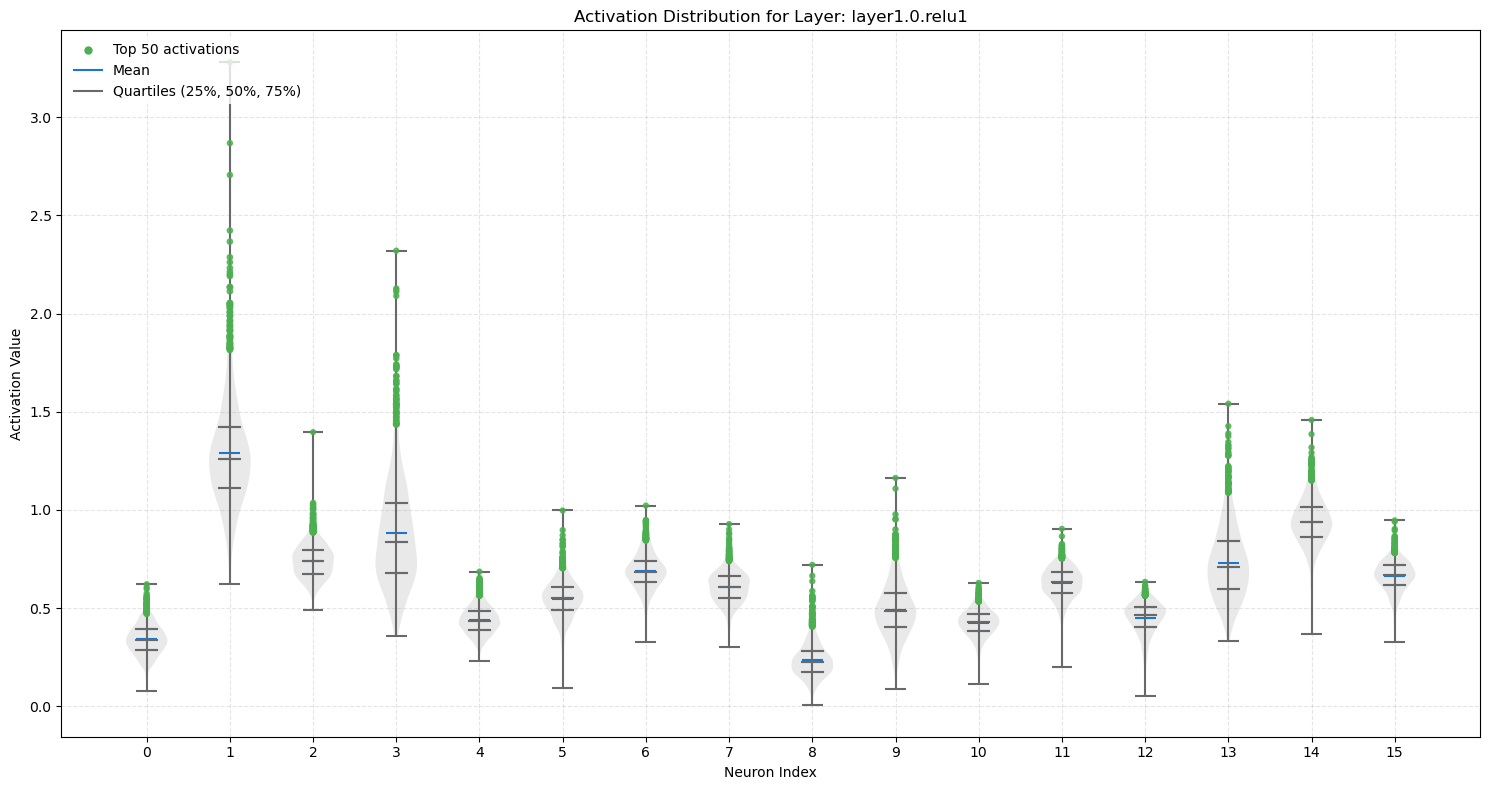

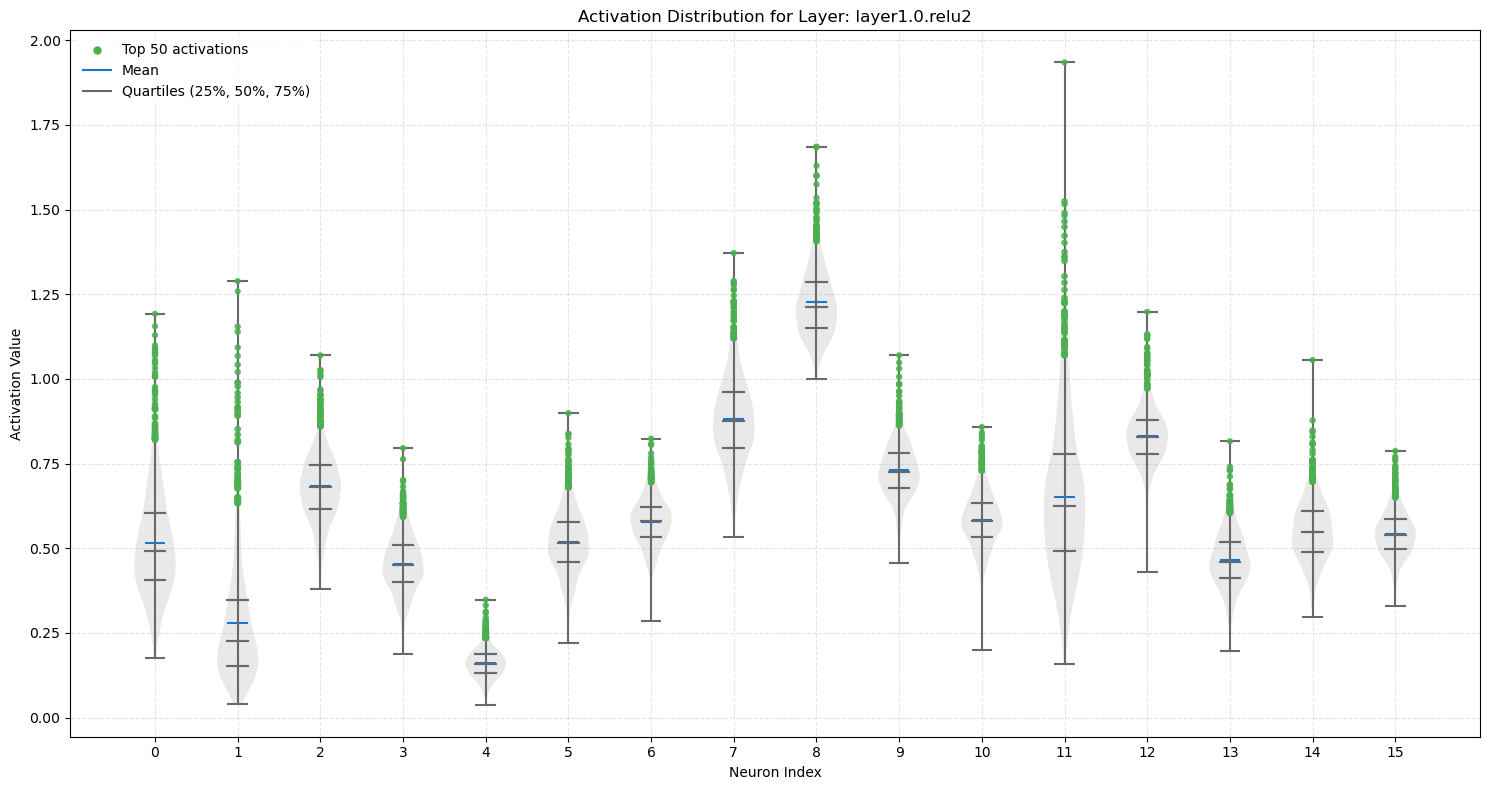

/tmp/ipykernel_426682/4168951371.py:65: RuntimeWarning: invalid value encountered in divide
  sizes = base_size * (1 / (1 + top_n_values/max_val))


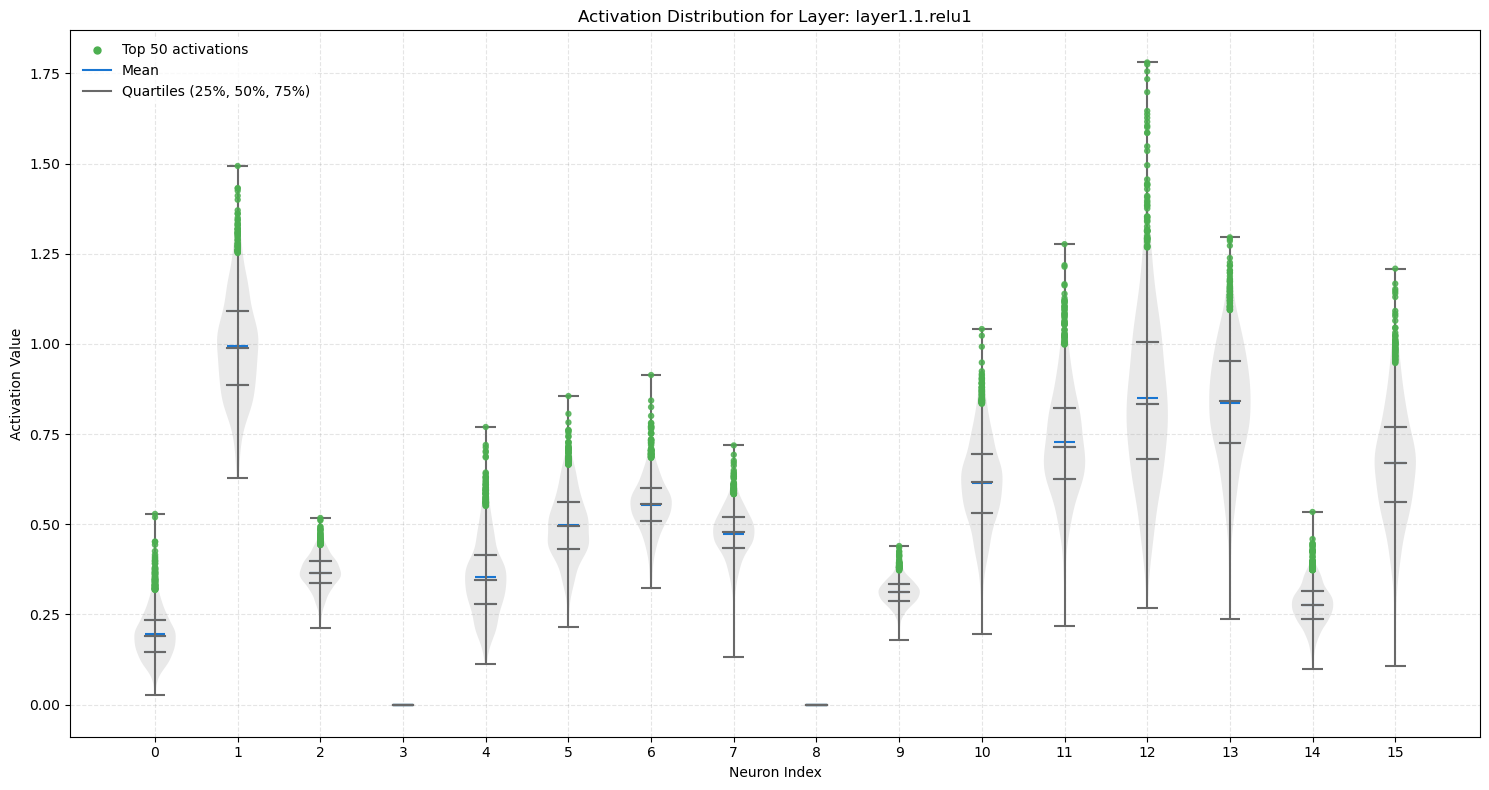

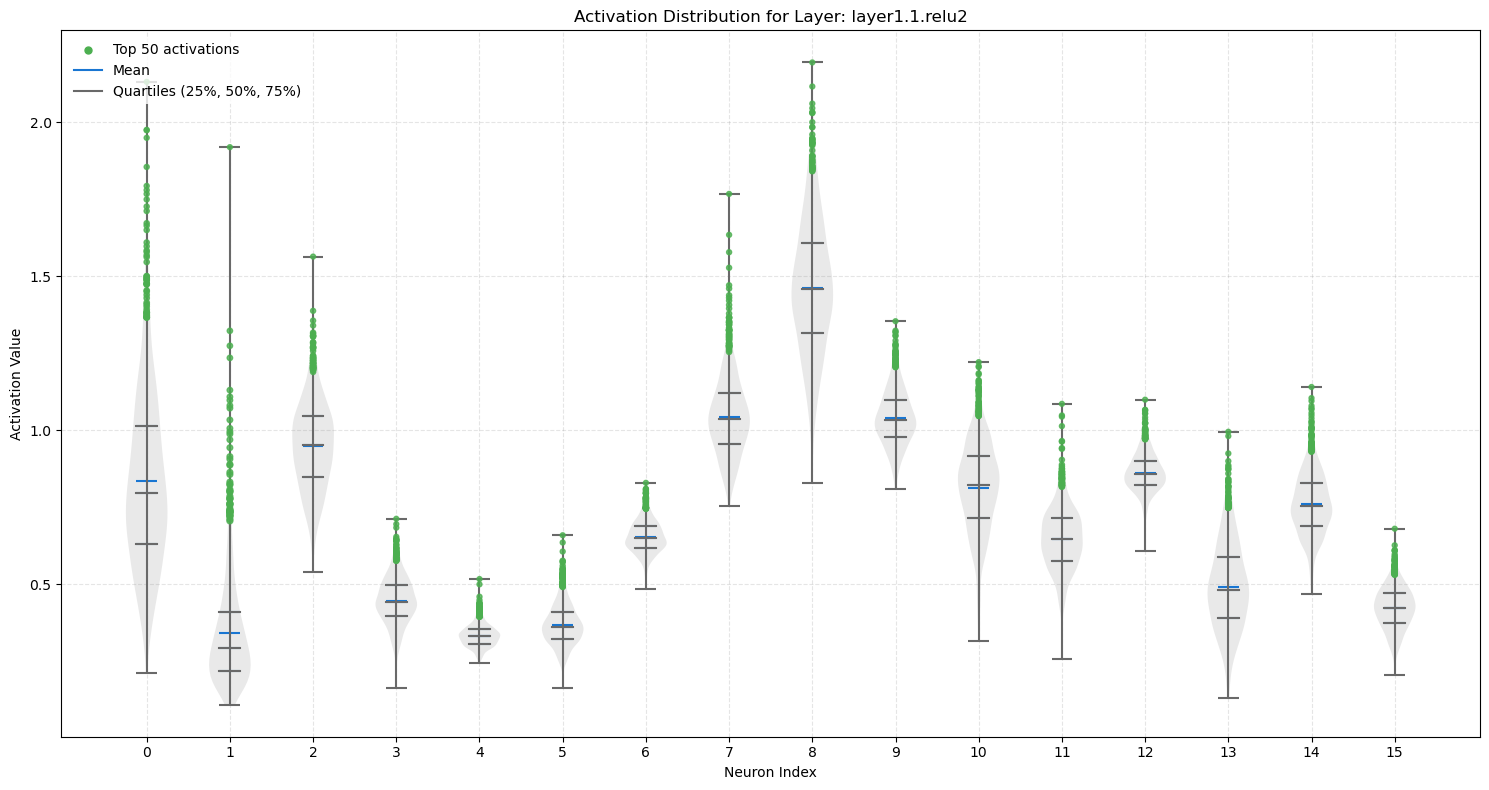

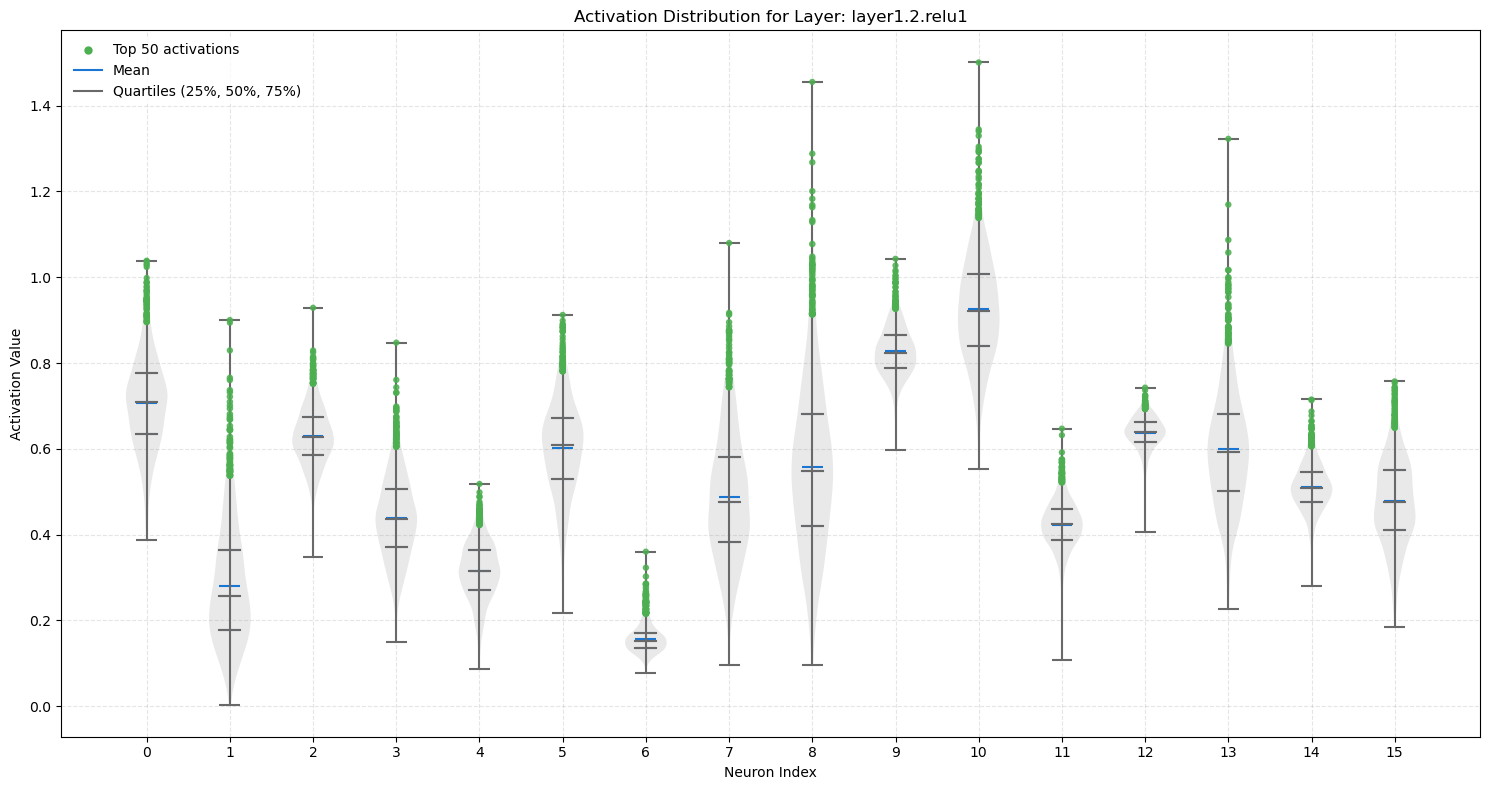

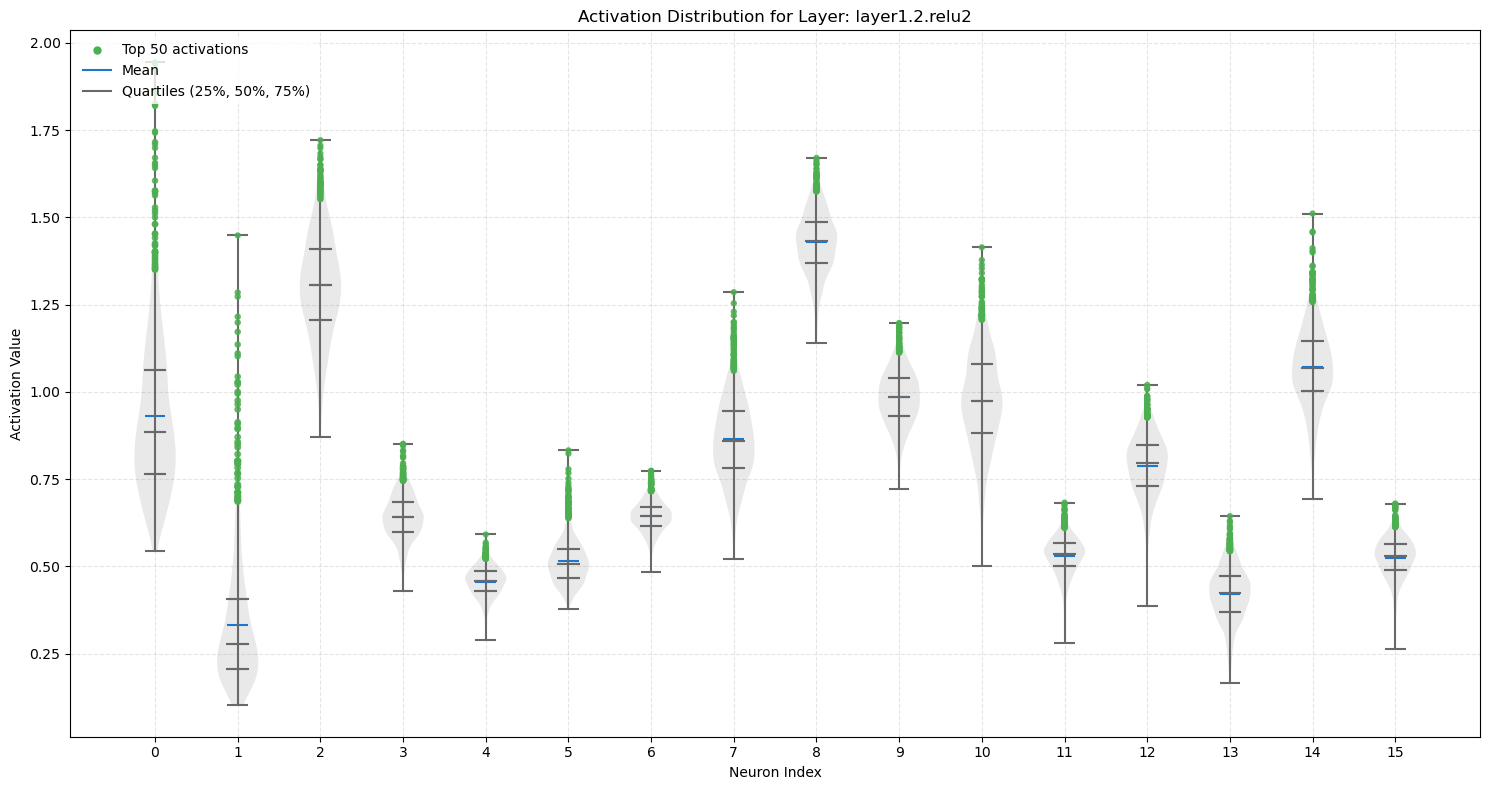

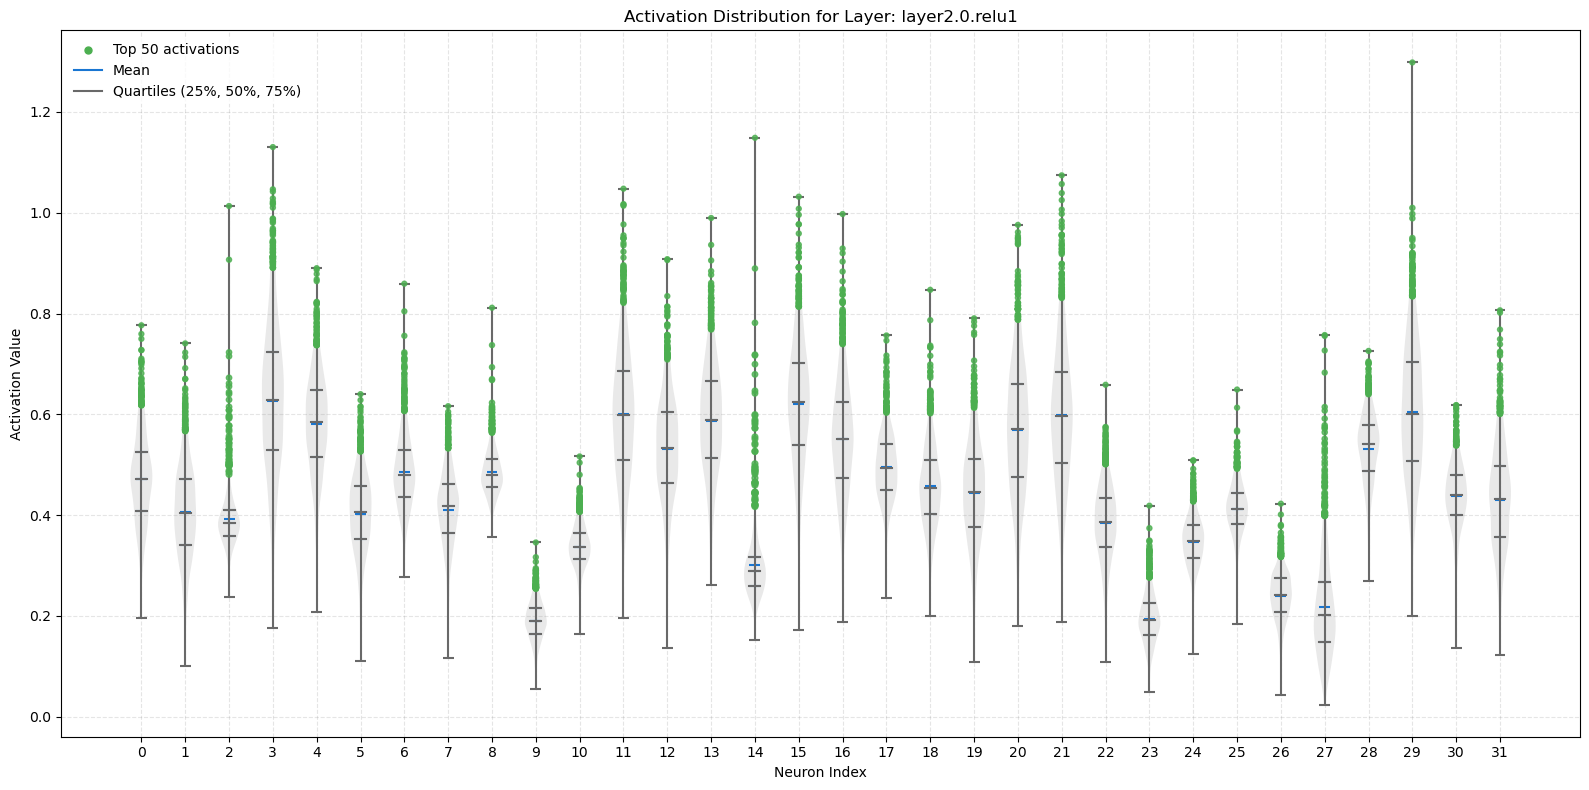

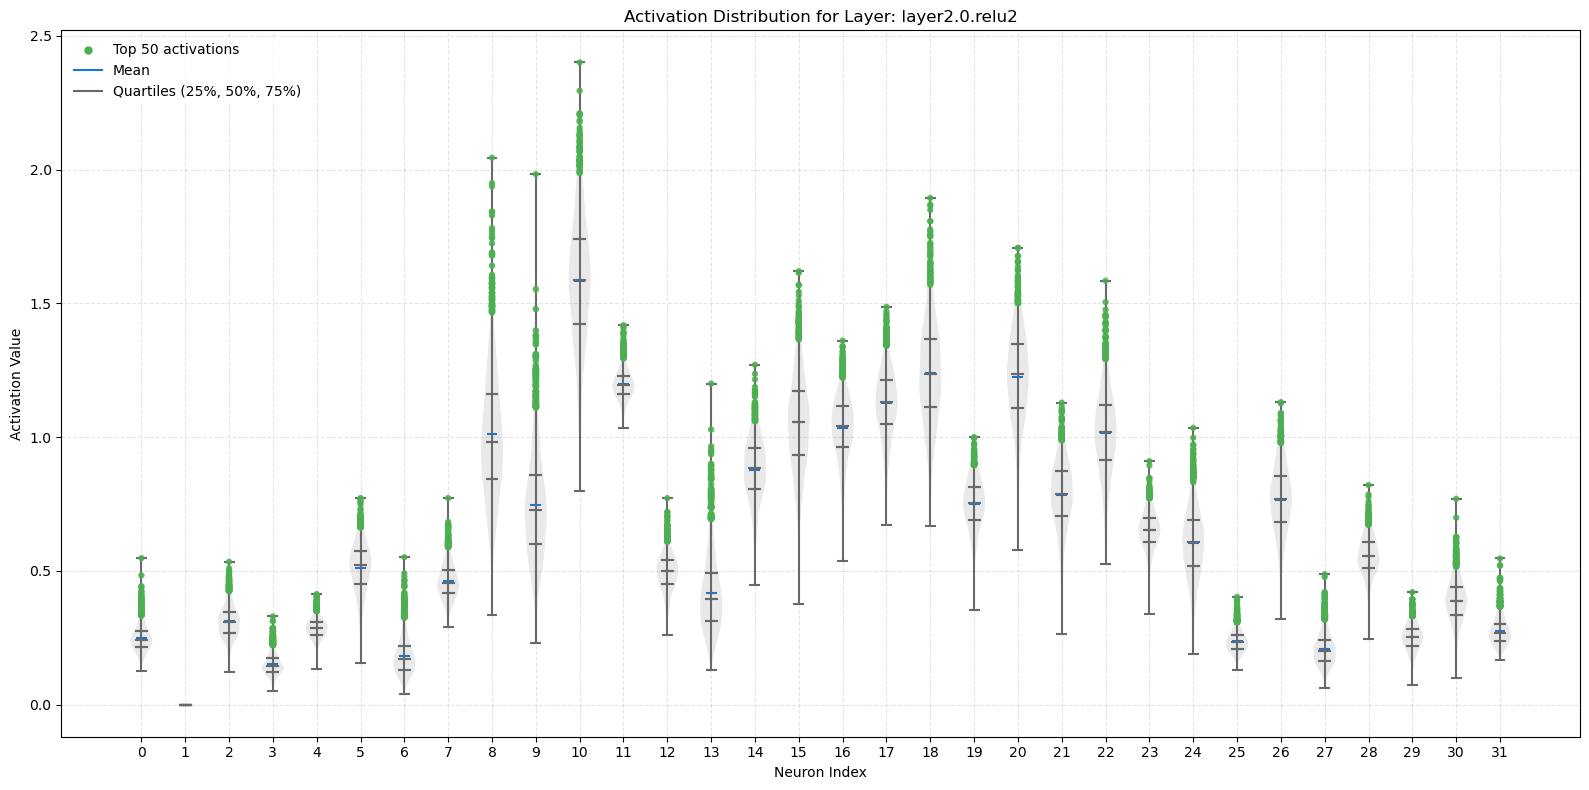

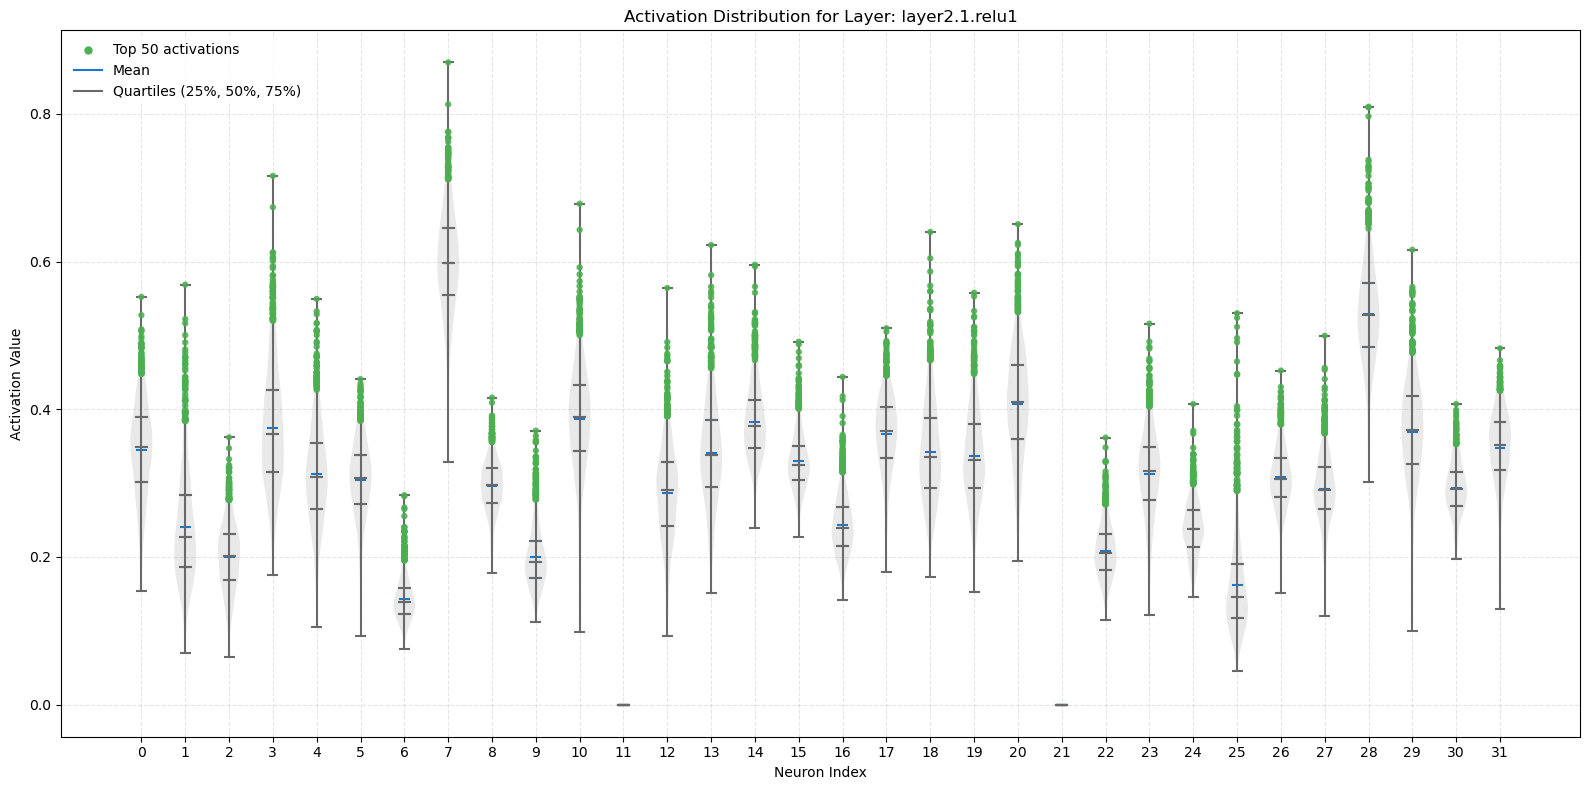

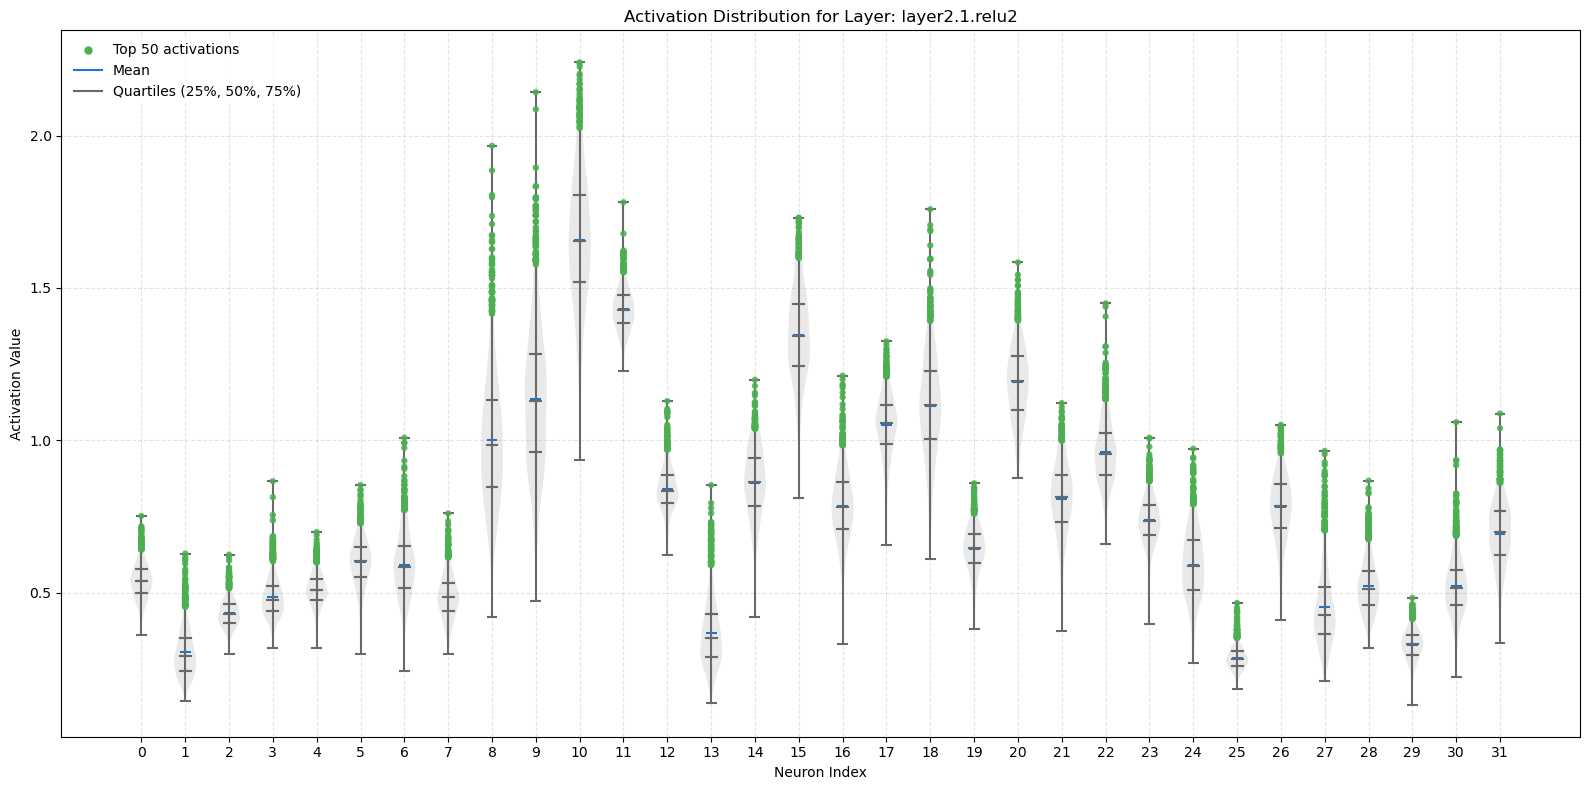

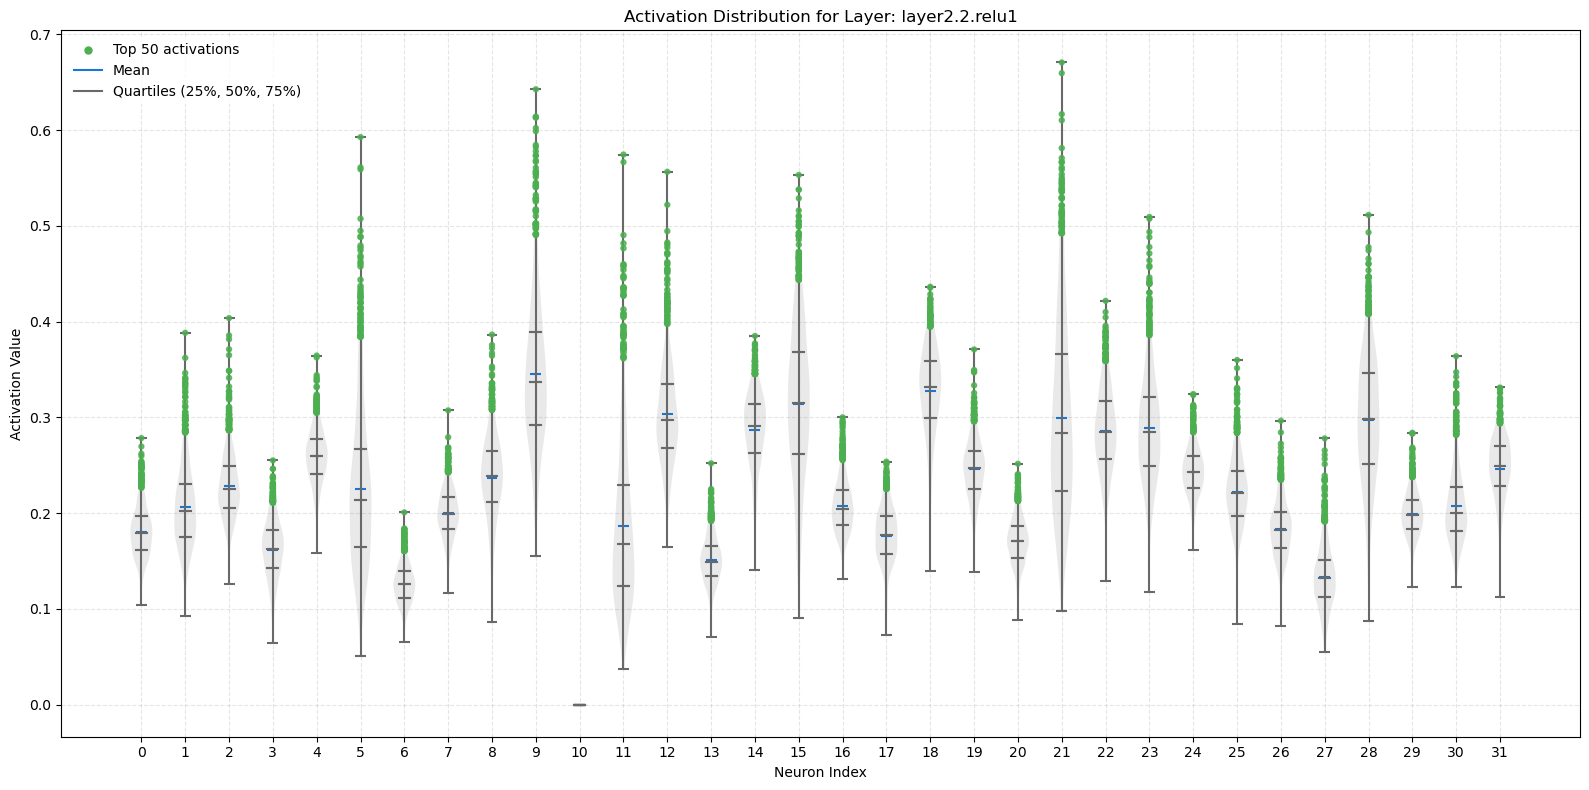

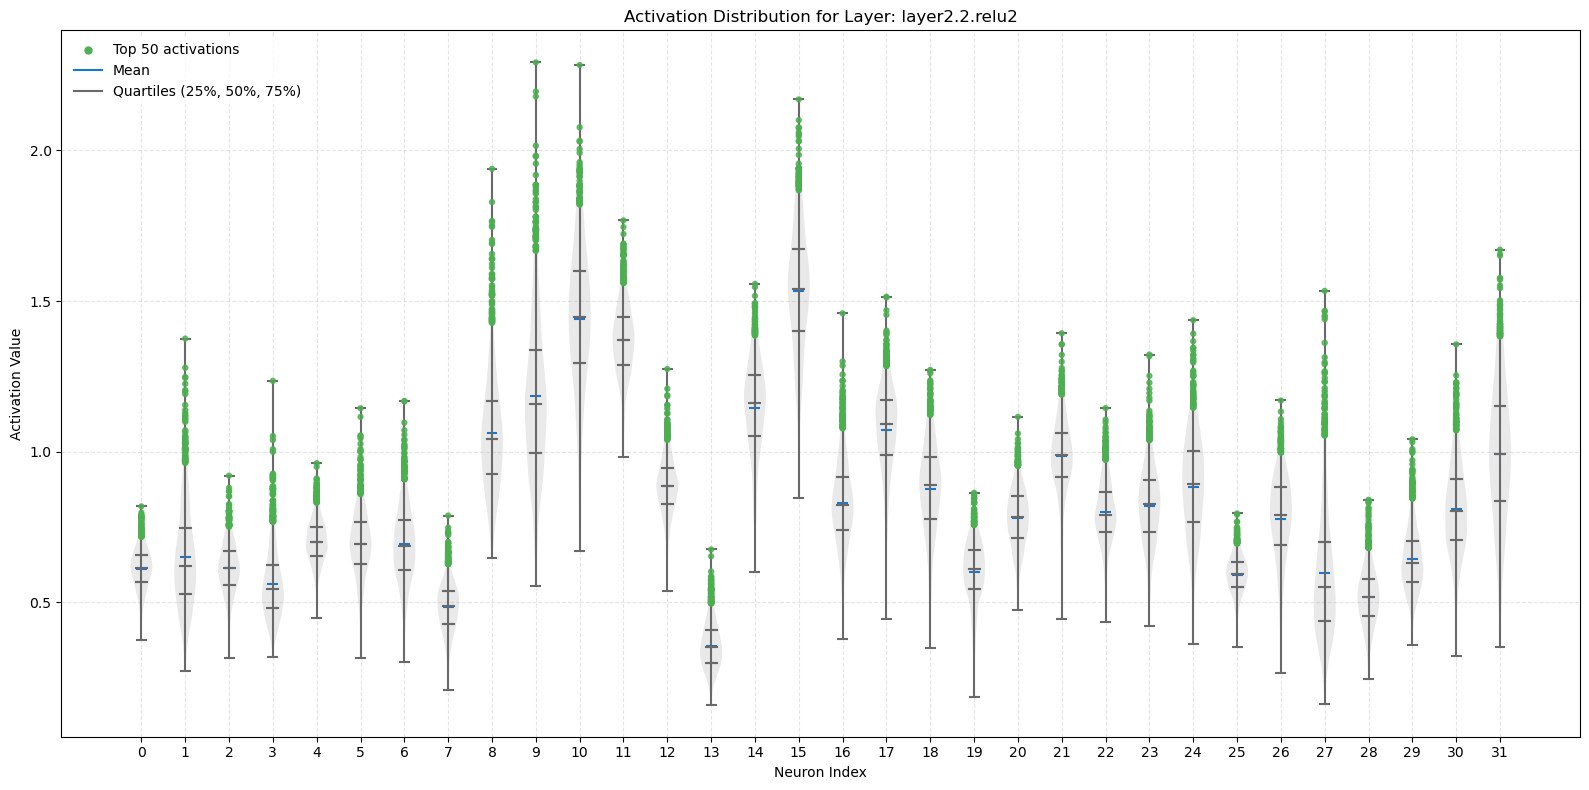

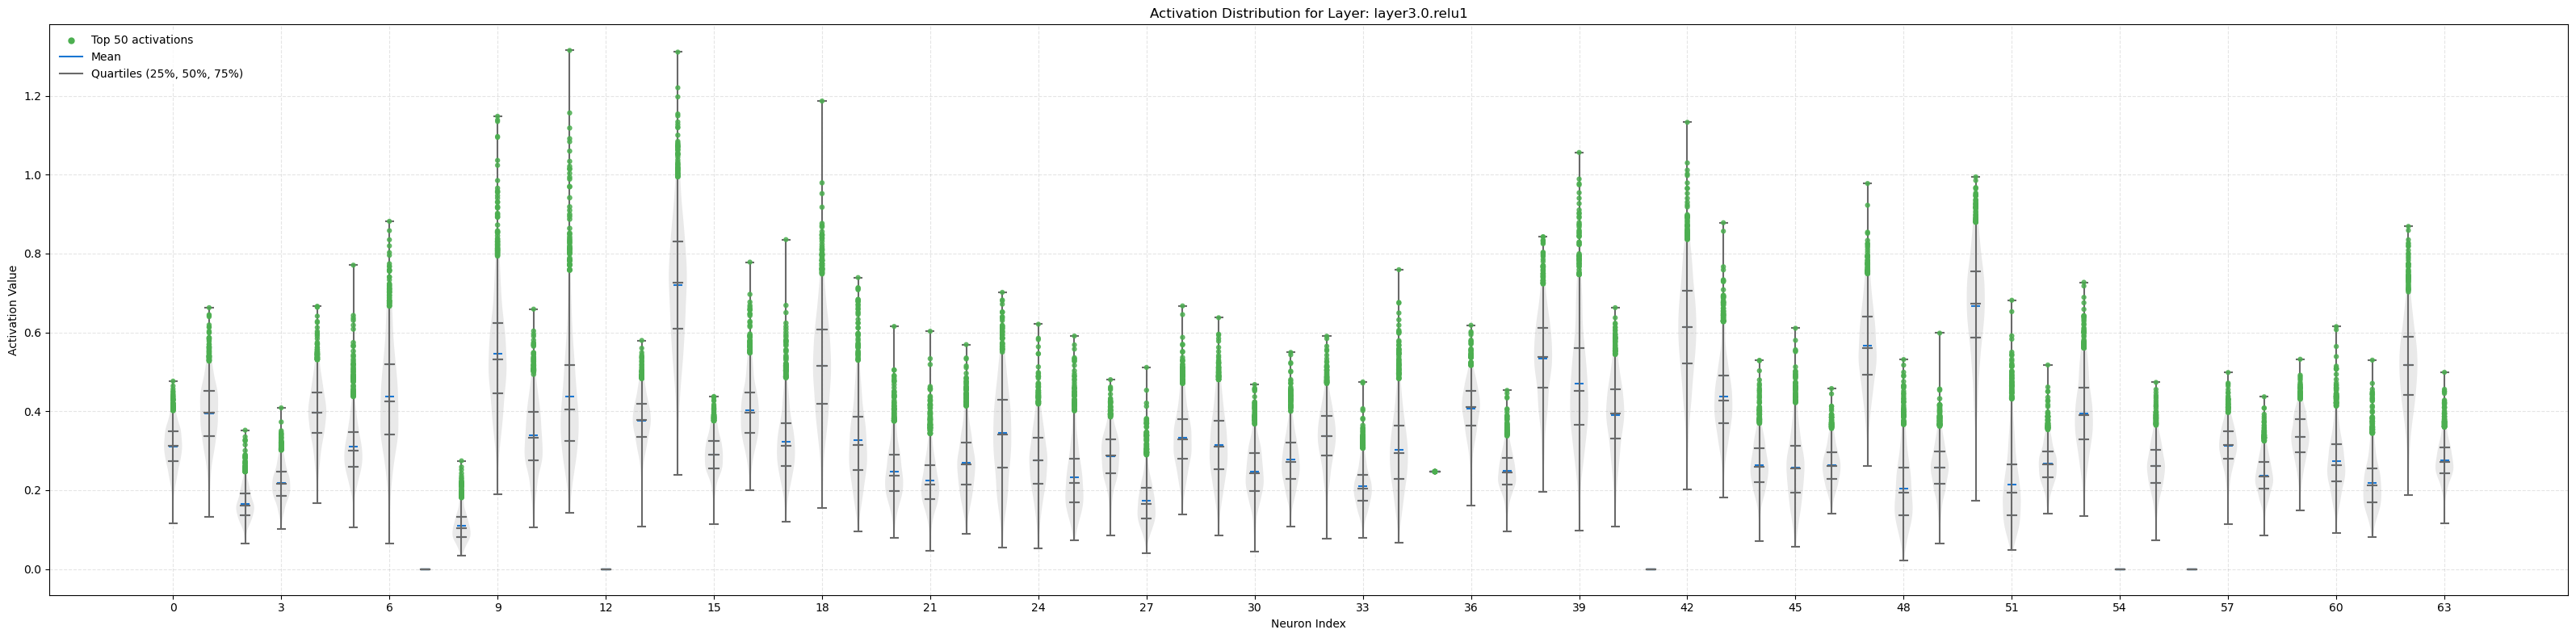

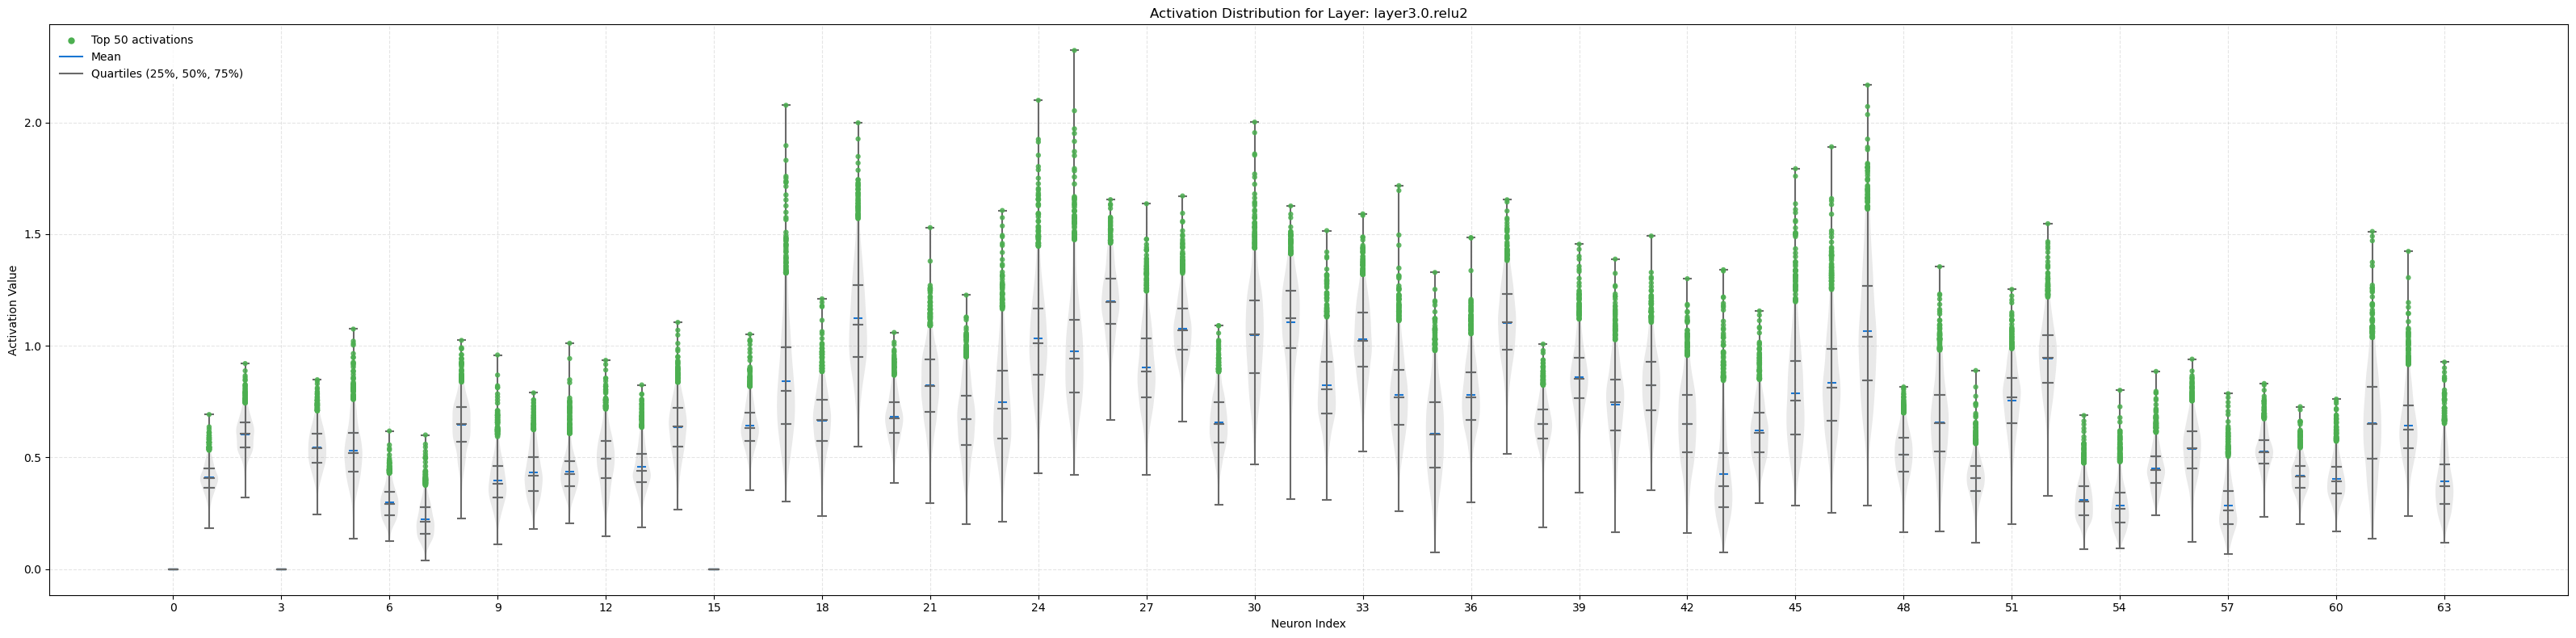

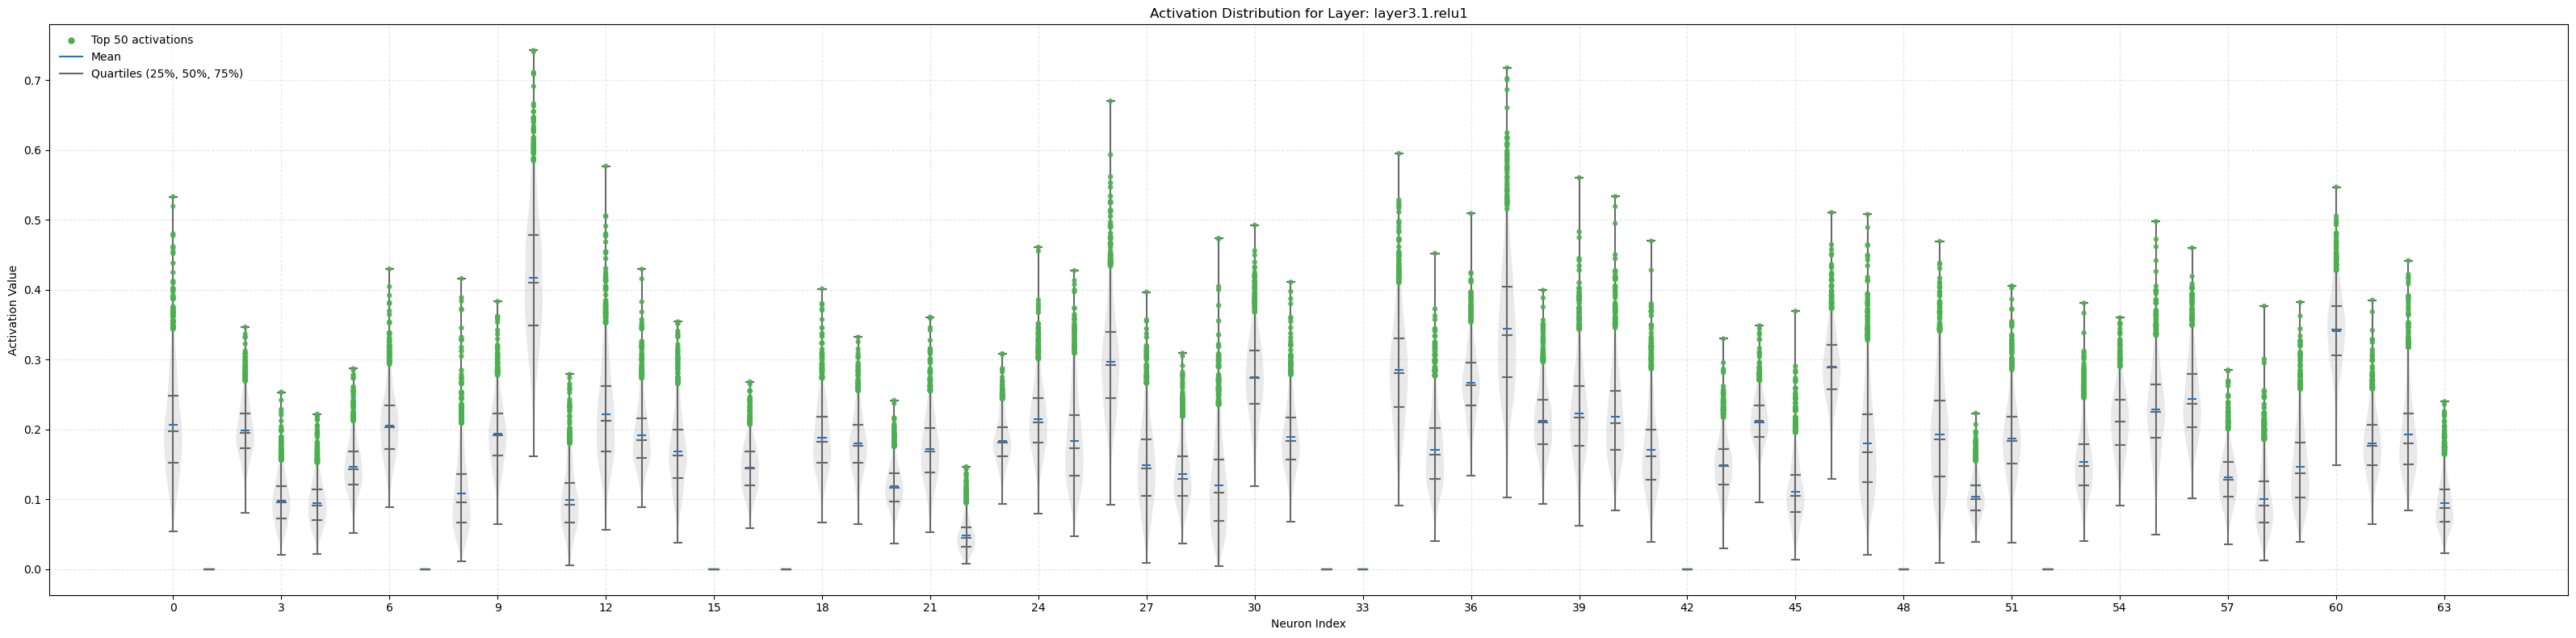

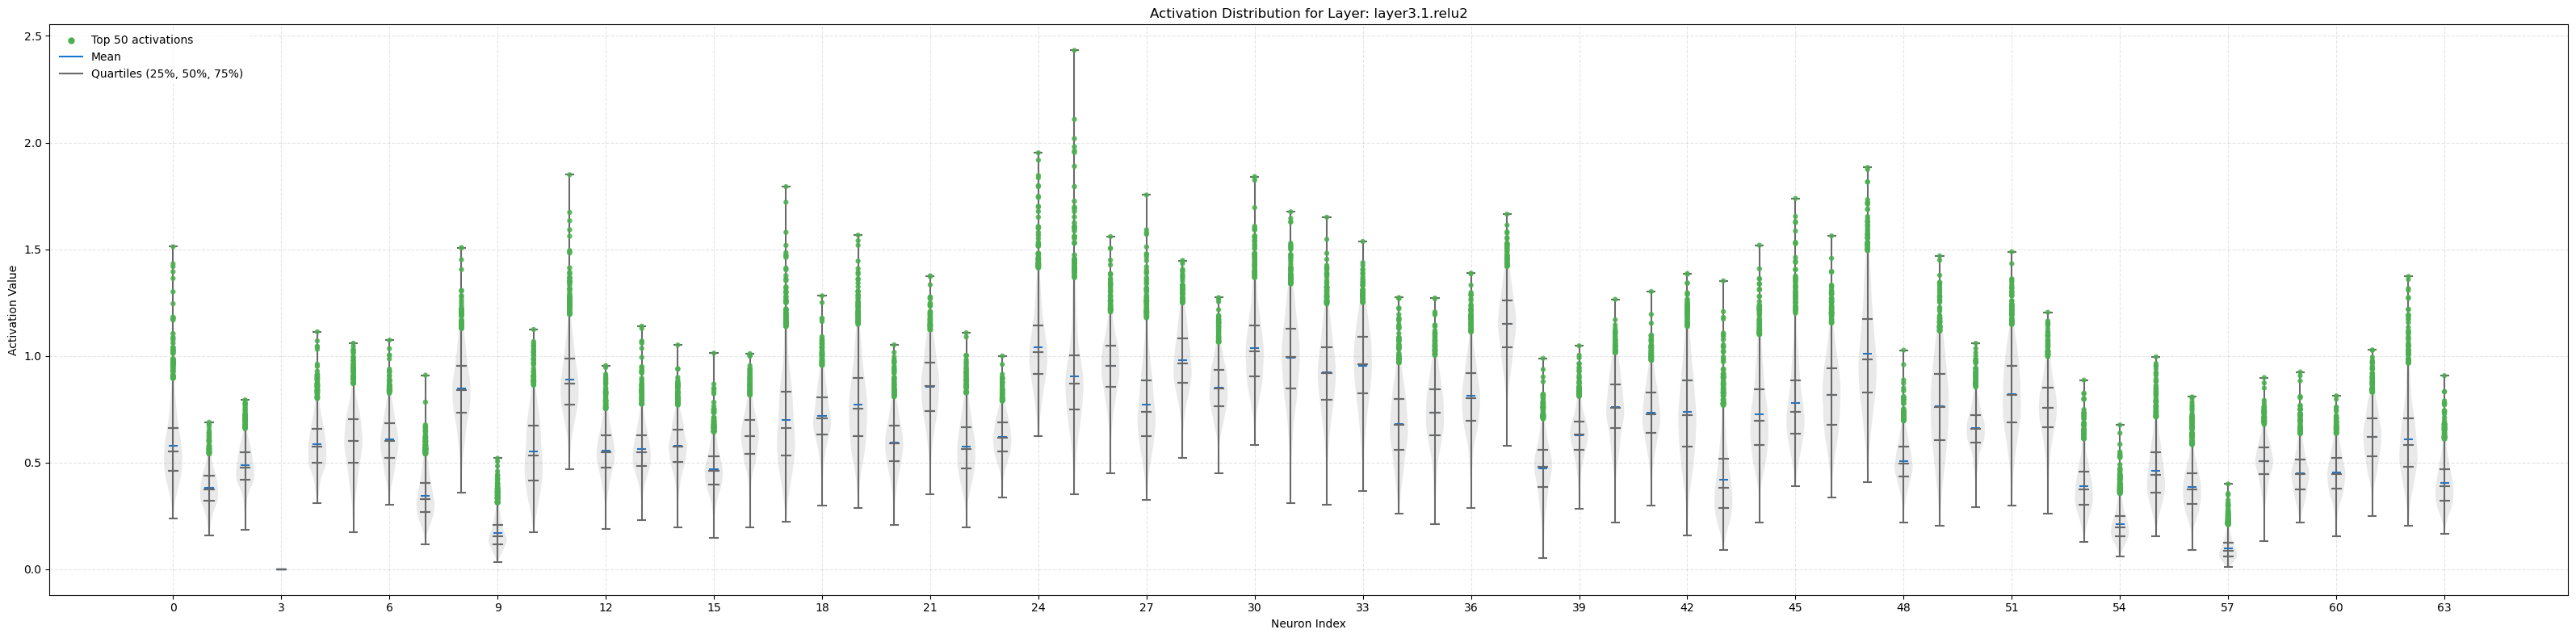

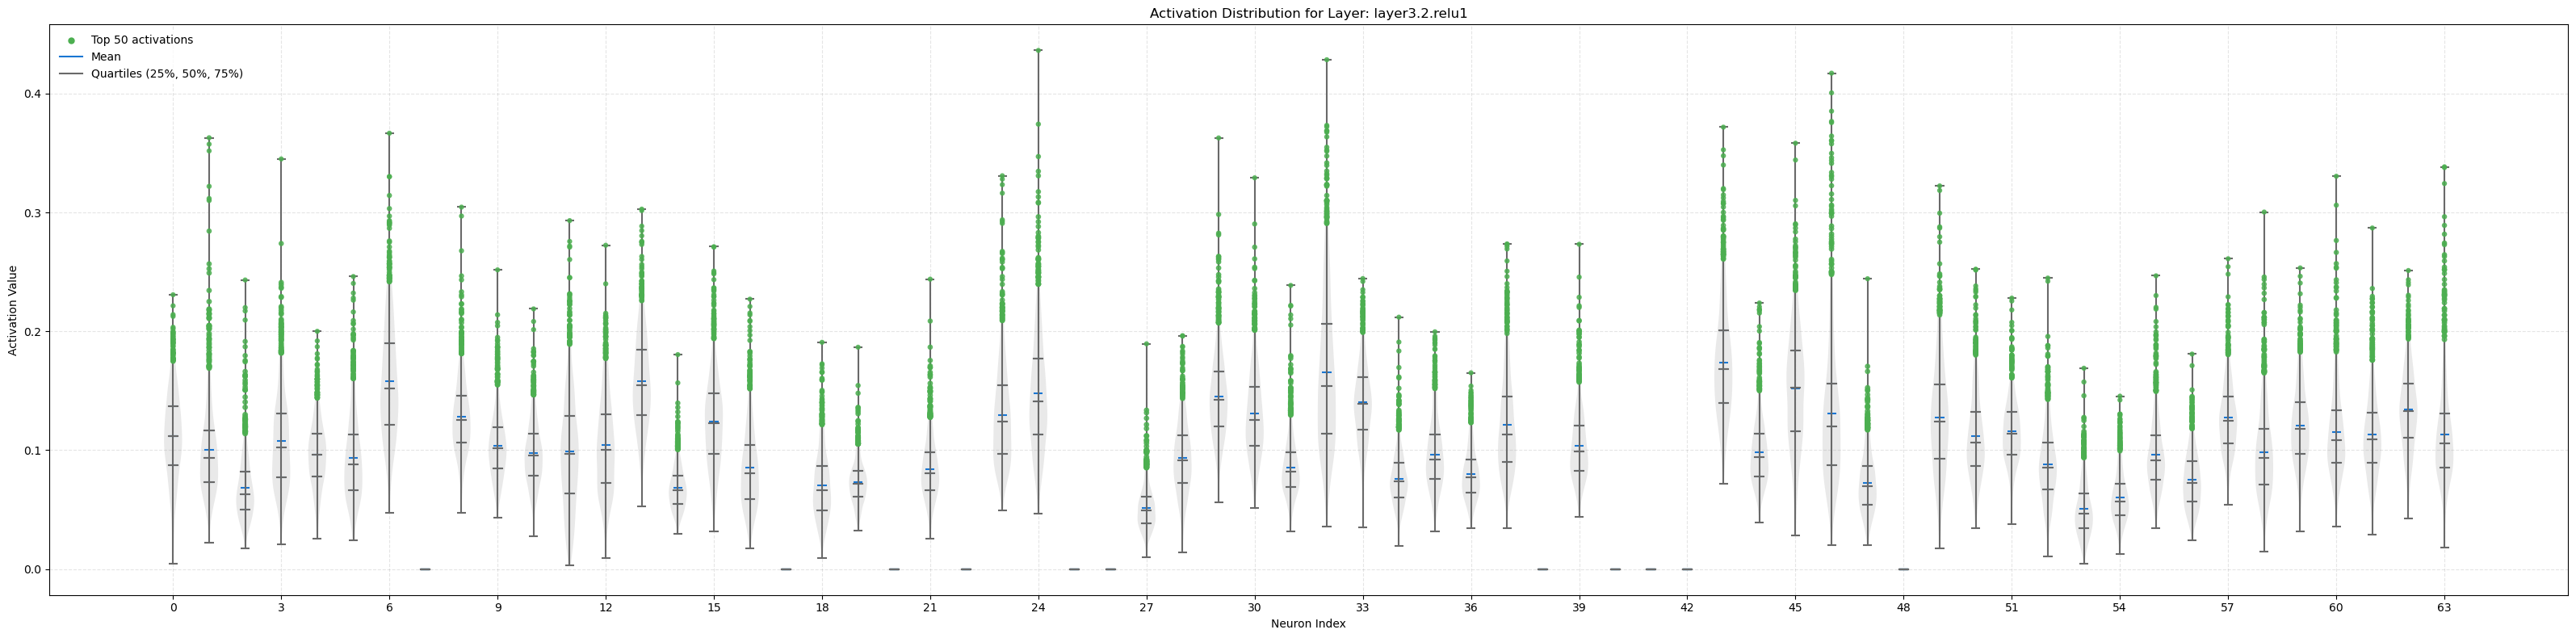

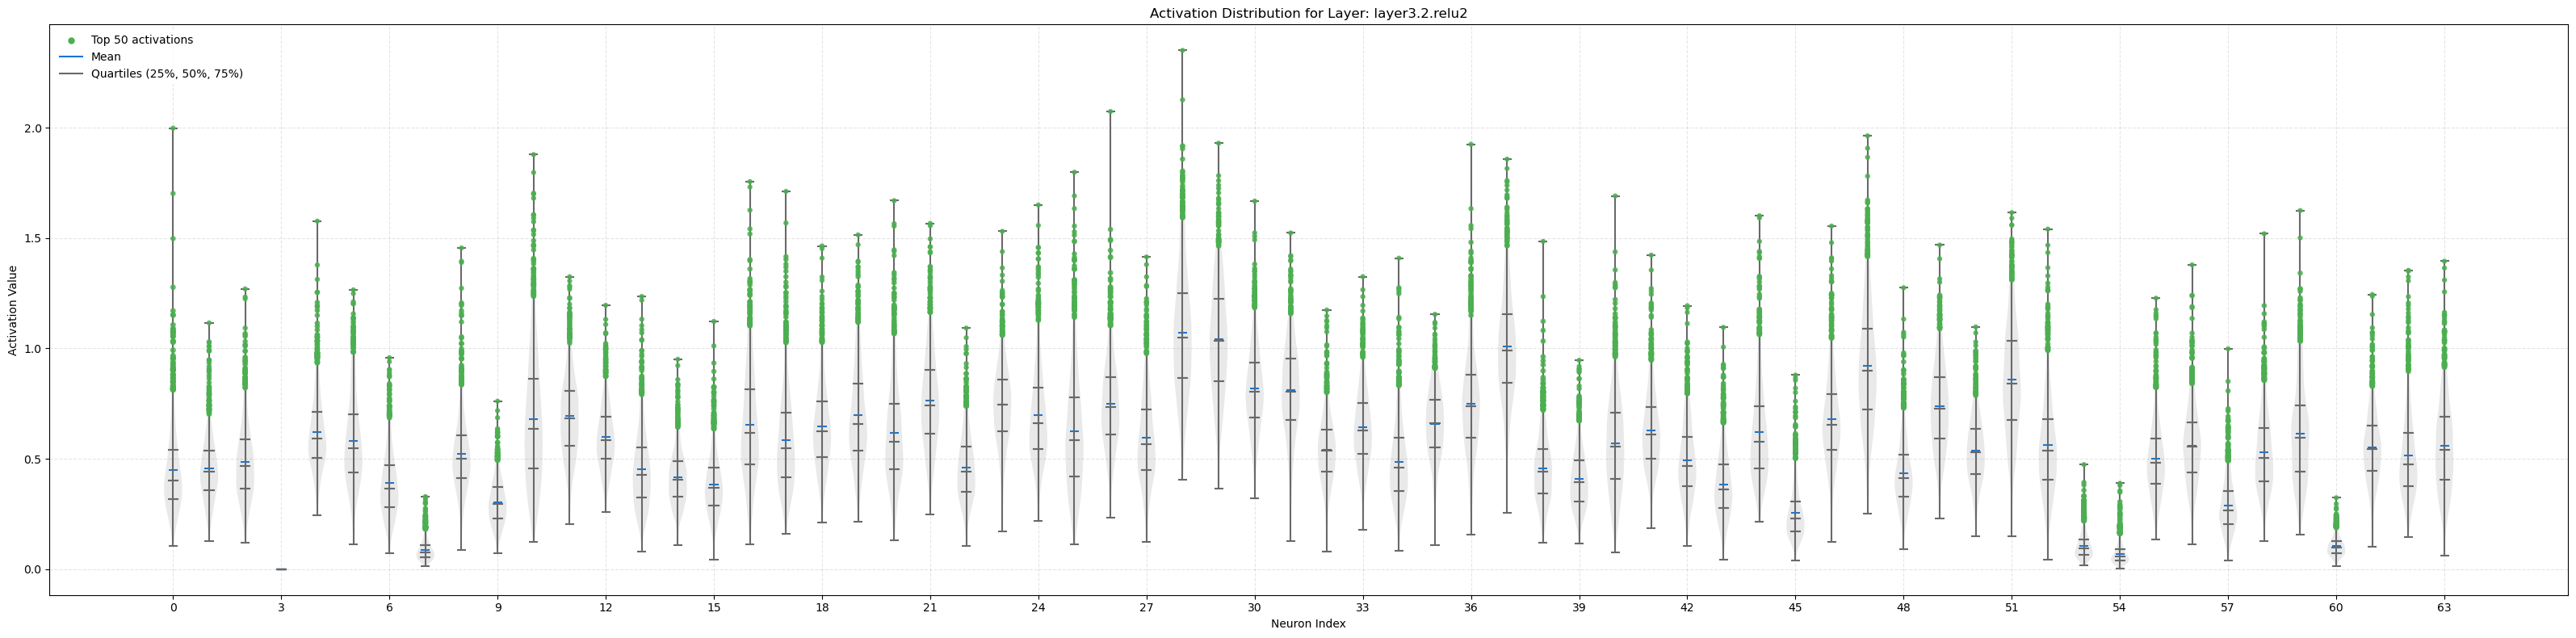

In [4]:
# Example usage:

avg_acts_1000 = load_json_dict("/home/ayesha/SparseMem/eval_neurons/results_all_20112024/unitmem/exp__11/All_activations")
plot_layer_activations(avg_acts_1000["1"], top=50)